### Use Autoencoder to implement anomaly detection. Build the model by using: 
1. Import required libraries 
2. Upload / access the dataset 
3. Encoder converts it into latent representation 
4. Decoder networks convert it back to the original input 
5. Compile the models with Optimizer, Loss, and Evaluation Metrics

#### We'll start simple, with a single fully-connected neural layer as encoder and as decoder:

In [1]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

#### Let's also create a separate encoder model:


In [2]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

#### As well as the decoder model:


In [3]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))

# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

#### Now let's train our autoencoder to reconstruct MNIST digits.
First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer:

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#### Let's prepare our input data. We're using MNIST digits, and we're discarding the labels (since we're only interested in encoding/decoding the input images).

In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

#### We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.


In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


#### Now let's train our autoencoder for 50 epochs:

In [8]:

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0968 - val_loss: 0.0950
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0958 - val_loss: 0.0941
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0952 - val_loss: 0.0937
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0947 - val_loss: 0.0932
Epoch 5/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0944 - val_loss: 0.0930
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0941 - val_loss: 0.0927
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0939 - val_loss: 0.0926
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0938 - val_loss: 0.0925
Epoch 9/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0937 - val_loss: 0.0924
Epoch 10/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0936 - val_loss: 0.0923

#### After 50 epochs, the autoencoder seems to reach a stable train/validation loss value of about 0.09. We can try to visualize the reconstructed inputs and the encoded representations. We will use Matplotlib.

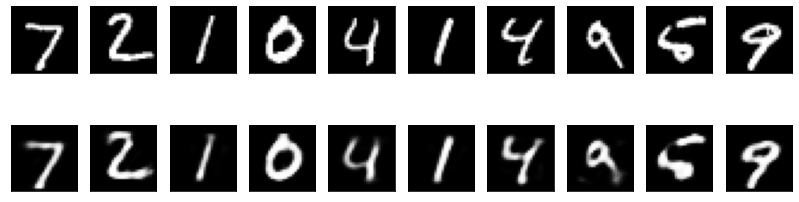

In [9]:
# Encode and decode some digits
# we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Use Matplotlib

import matplotlib.pyplot as plt
n = 10  # How many digits to display
plt.figure(figsize=(14, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Here's what we get. The top row is the original digits, and the bottom row is the reconstructed digits. We are losing quite a bit of detail with this basic approach.
